In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:20.4f}'.format

import _pickle as cPickle
import boto3
import pandas as pd
import boto3.session

In [2]:
from exploration import exploration_functions as ef

In [2]:
import feature_generation_functions as fgf

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
train = pd.read_csv("s3://advancedml-koch-mathur-hinkson/train.csv")
test = pd.read_csv("s3://advancedml-koch-mathur-hinkson/test.csv")

In [6]:
test.shape, train.shape

((97320, 2), (1804874, 45))

In [7]:
train.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

### Average Toxicity of Comments with Specific Identities or Reactions

In [8]:
train[train.funny > 0].target.mean()

0.10400058616844869

In [9]:
train[train.male > 0.5].target.mean()

0.18159273674318185

In [10]:
train[train.female > 0.5].target.mean()

0.1726707927689452

In [11]:
train.head(5).style

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0,"This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!",0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2015-09-29 10:50:41.987077+00,2,nan,2006,rejected,0,0,0,0,0,0,0,4
1,59849,0,"Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!",0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2015-09-29 10:50:42.870083+00,2,nan,2006,rejected,0,0,0,0,0,0,0,4
2,59852,0,This is such an urgent design problem; kudos to you for taking it on. Very impressive!,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2015-09-29 10:50:45.222647+00,2,nan,2006,rejected,0,0,0,0,0,0,0,4
3,59855,0,Is this something I'll be able to install on my site? When will you be releasing it?,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2015-09-29 10:50:47.601894+00,2,nan,2006,rejected,0,0,0,0,0,0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.0212766,0,0.0212766,0.87234,0,0,0,0,0,0,0,0,0,0,0,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-09-29 10:50:48.488476+00,2,nan,2006,rejected,0,0,0,1,0,0,4,47


In [12]:
train.male.unique().round(3)

array([  nan, 0.   , 0.6  , 0.167, 1.   , 0.833, 0.2  , 0.8  , 0.1  ,
       0.5  , 0.333, 0.3  , 0.9  , 0.25 , 0.4  , 0.75 , 0.7  , 0.01 ,
       0.002, 0.667, 0.009, 0.125, 0.111, 0.011, 0.819, 0.018, 0.721,
       0.973, 0.759, 0.012, 0.856, 0.857, 0.889, 0.222, 0.803, 0.162,
       0.004, 0.001, 0.026, 0.455, 0.014, 0.01 , 0.928, 0.029, 0.034,
       0.003, 0.001, 0.617, 0.003, 0.001, 0.143, 0.011, 0.001, 0.05 ,
       0.364, 0.881, 0.295, 0.156, 0.007, 0.599, 0.001, 0.286, 0.004,
       0.778, 0.714, 0.818, 0.012, 0.047, 0.091, 0.009, 0.001, 0.636,
       0.046, 0.014, 0.571, 0.919, 0.012, 0.182, 0.959, 0.005, 0.429,
       0.875, 0.037, 0.005, 0.003, 0.023, 0.132, 0.864, 0.002, 0.03 ,
       0.001, 0.815, 0.002, 0.001, 0.018, 0.98 , 0.727, 0.008, 0.003,
       0.981, 0.919, 0.816, 0.909, 0.987, 0.01 , 0.004, 0.005, 0.001,
       0.927, 0.545, 0.978, 0.015, 0.004, 0.007, 0.417, 0.02 , 0.001,
       0.006, 0.97 , 0.99 , 0.003, 0.125, 0.009, 0.556, 0.97 , 0.011,
       0.482, 0.001,

In [13]:
train_summary, train_types = ef.summarize_df(train)

In [14]:
train_summary.round(4)

,num_values,num_nulls,unique_values,data_type,col_type,most_common,prevalence
col_name,,,,,,,
id,1804874,0,1804874,int64,ID,59848,0.0001
target,1804874,0,2913,float64,numeric,0.0000,70.0749
comment_text,1804874,0,1780823,object,tops,Well said.,0.0102
severe_toxicity,1804874,0,1460,float64,geo,0.0000,94.2026
obscene,1804874,0,2417,float64,numeric,0.0000,91.8457
identity_attack,1804874,0,2294,float64,ID,0.0000,87.8910
insult,1804874,0,3042,float64,numeric,0.0000,74.8160
threat,1804874,0,2053,float64,numeric,0.0000,94.0755
asian,405130,1399744,126,float64,numeric,0.0000,97.2910


In [15]:
train_types = ef.recateogrize_col(col='toxicity_annotator_count', new_category='numeric', col_dict = train_types)
train_types = ef.recateogrize_col(col='identity_annotator_count', new_category='numeric', col_dict = train_types)
train_types = ef.recateogrize_col(col='identity_attack', new_category='numeric', col_dict = train_types)
train_types = ef.recateogrize_col(col='rating', new_category='multi', col_dict = train_types)
train_types = ef.recateogrize_col(col='severe_toxicity', new_category='numeric', col_dict = train_types)
train_types = ef.recateogrize_col(col='other_race_or_ethnicity', new_category='numeric', col_dict = train_types)
train_types = ef.recateogrize_col(col='comment_text', new_category='multi', col_dict = train_types)
train_types = ef.recateogrize_col(col='created_date', new_category='multi', col_dict = train_types)

In [16]:
train_types

defaultdict(list,
            {'ID': ['id', 'publication_id', 'parent_id', 'article_id'],
             'numeric': ['target',
              'obscene',
              'insult',
              'threat',
              'asian',
              'atheist',
              'bisexual',
              'black',
              'buddhist',
              'christian',
              'female',
              'heterosexual',
              'hindu',
              'homosexual_gay_or_lesbian',
              'intellectual_or_learning_disability',
              'jewish',
              'latino',
              'male',
              'muslim',
              'other_disability',
              'other_gender',
              'other_religion',
              'other_sexual_orientation',
              'physical_disability',
              'psychiatric_or_mental_illness',
              'transgender',
              'white',
              'funny',
              'wow',
              'sad',
              'likes',
              'disagree

In [19]:
train.loc[train['article_id']==352700].head(5).style

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
1169305,5545064,0.6,Some things should be mercilessly mocked and shamed.,0,0,0,0.3,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-07-07 12:12:33.593960+00,102,nan,352700,approved,32,0,3,128,8,0,4,10
1169315,5545075,0,"One would have to believe that millions and millions of people are involved in a conspiracy to cover up a flat earth! Deny flights that have gone around the planet, satellites, etc. All those images of the globe would have to be considered fakes and conspiratorial. Just wow!",0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2017-07-07 12:15:09.081441+00,102,nan,352700,approved,2,1,0,18,0,0,0,4
1169322,5545084,0,"""They want to create two classes: the ultra rich and servants. At that point they would’ve taken over the world, and enslaved the population, and controlled everything.” Well, that explains everything",0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2017-07-07 12:19:29.788566+00,102,nan,352700,approved,0,0,0,2,1,0,0,4
1169323,5545085,0.166667,"Let me guess, these people don't think human carbon emissions contribute to climate change either...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-07-07 12:19:26.684442+00,102,nan,352700,approved,0,0,2,10,4,0,4,6
1169327,5545090,0.166667,"The climate change debate is about the quantity of contribution, impact, and ability of people to control the environment Nice troll though",0,0,0,0.166667,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2017-07-07 12:21:05.880053+00,102,5.54508e+06,352700,approved,1,0,3,8,2,0,0,6


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


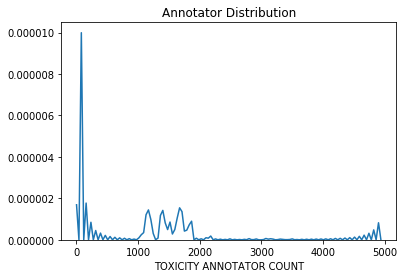

In [20]:

annotator_dist = sns.distplot(train['toxicity_annotator_count'], hist=False)
renamed_x = annotator_dist.get_xlabel()
renamed_x = renamed_x.replace('_', ' ').upper()
annotator_dist.set_xlabel(renamed_x)
annotator_dist.set_title("Annotator Distribution")
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


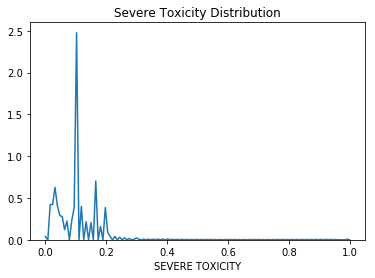

In [21]:
severe_toxicity_dist = sns.distplot(train['severe_toxicity'], hist=False)
renamed_x = severe_toxicity_dist.get_xlabel()
renamed_x = renamed_x.replace('_', ' ').upper()
severe_toxicity_dist.set_xlabel(renamed_x)
severe_toxicity_dist.set_title("Severe Toxicity Distribution")
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


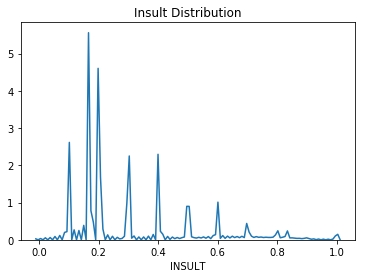

In [22]:
insult_dist = sns.distplot(train['insult'], hist=False)
renamed_x = insult_dist.get_xlabel()
renamed_x = renamed_x.replace('_', ' ').upper()
insult_dist.set_xlabel(renamed_x)
insult_dist.set_title("Insult Distribution")
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


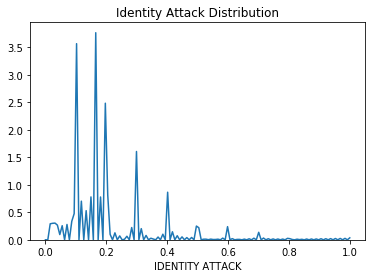

In [23]:
identity_dist = sns.distplot(train['identity_attack'], hist=False)
renamed_x = identity_dist.get_xlabel()
renamed_x = renamed_x.replace('_', ' ').upper()
identity_dist.set_xlabel(renamed_x)
identity_dist.set_title("Identity Attack Distribution")
plt.show()

In [24]:
train['toxicity_annotator_count'].describe()

count           1804874.0000
mean                  8.7847
std                  43.5009
min                   3.0000
25%                   4.0000
50%                   4.0000
75%                   6.0000
max                4936.0000
Name: toxicity_annotator_count, dtype: float64

In [25]:
train.loc[train['toxicity_annotator_count'] > 10].shape

(77183, 45)

In [26]:
train.loc[train['toxicity_annotator_count'] > 1000].shape

(1235, 45)

In [27]:
train.loc[train['toxicity_annotator_count'] > 2000].shape

(66, 45)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


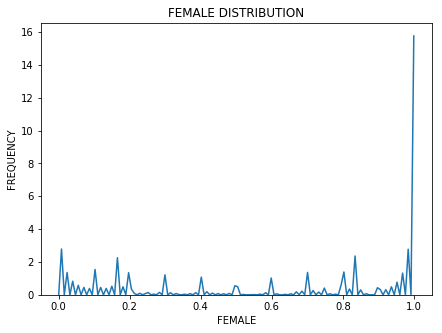

In [29]:
ef.individual_distribution(df=train, col_name='female', dropna=True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


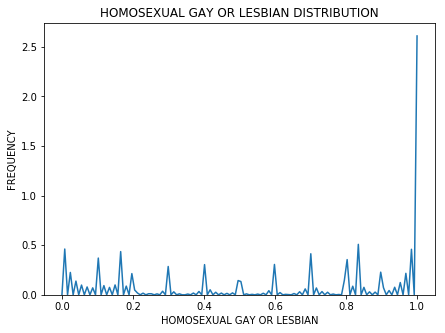

In [30]:
lgbt_dist = ef.individual_distribution(df=train, col_name='homosexual_gay_or_lesbian', dropna=True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


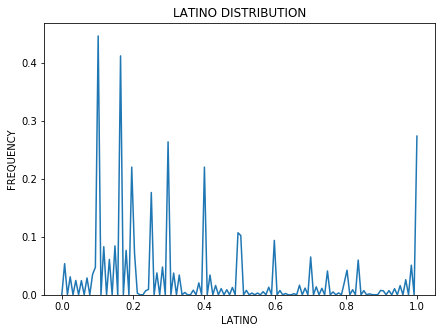

In [31]:
latino_dist = ef.individual_distribution(df=train, col_name='latino', dropna=True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


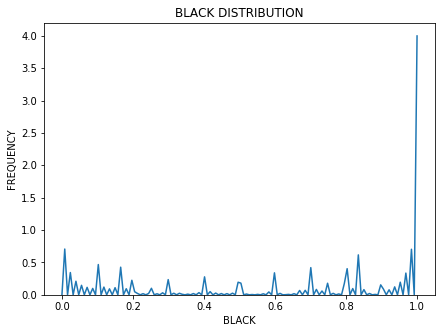

In [32]:
black_dist = ef.individual_distribution(df=train, col_name='black', dropna=True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


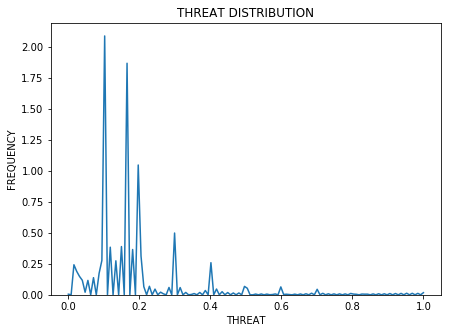

In [33]:
threat_dist = ef.individual_distribution(df=train, col_name='threat')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


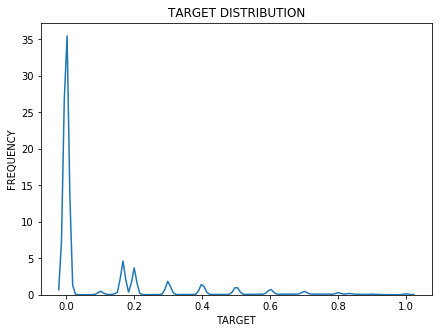

In [34]:
target_dist = ef.individual_distribution(df=train, col_name='target')

In [35]:
train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.0000,"This is so cool. It's like, 'would you want yo...",0.0000,0.0000,0.0000,0.0000,0.0000,nan,nan,...,2006,rejected,0,0,0,0,0,0.0000,0,4
1,59849,0.0000,Thank you!! This would make my life a lot less...,0.0000,0.0000,0.0000,0.0000,0.0000,nan,nan,...,2006,rejected,0,0,0,0,0,0.0000,0,4
2,59852,0.0000,This is such an urgent design problem; kudos t...,0.0000,0.0000,0.0000,0.0000,0.0000,nan,nan,...,2006,rejected,0,0,0,0,0,0.0000,0,4
3,59855,0.0000,Is this something I'll be able to install on m...,0.0000,0.0000,0.0000,0.0000,0.0000,nan,nan,...,2006,rejected,0,0,0,0,0,0.0000,0,4
4,59856,0.8936,haha you guys are a bunch of losers.,0.0213,0.0000,0.0213,0.8723,0.0000,0.0000,0.0000,...,2006,rejected,0,0,0,1,0,0.0000,4,47


### Exploration on some processed data

In [37]:
train['toxicity_category'] = train.target.apply(lambda x: 1 if x > 0.5 else 0)

In [38]:
train['toxicity_category'].describe()

count           1804874.0000
mean                  0.0590
std                   0.2356
min                   0.0000
25%                   0.0000
50%                   0.0000
75%                   0.0000
max                   1.0000
Name: toxicity_category, dtype: float64

Toxic and nontoxic counts:

In [48]:
train['toxicity_category'].value_counts()

0    1698436
1     106438
Name: toxicity_category, dtype: int64

Percent toxic comments in whole train data set:

In [49]:
106438/1698436

0.06266824301887149

In [46]:
train_sample = train.sample(frac=0.25, replace=True)

In [47]:
train_sample.shape

(451218, 46)

In [50]:
processed_data = fgf.generate_all_features(train_sample)

Split comments...Elapsed Time:  0.054 minutes
Cleaned with stopwords...Elapsed Time:  0.255 minutes
Cleaned without stopwords...Elapsed Time:  0.355 minutes
Stemmed (Porter)...Elapsed Time:  6.969 minutes
Stemmed (Lancaster)...Elapsed Time:  5.763 minutes
Created bigrams...Elapsed Time:  0.139 minutes
Calculated uppercase pct...Elapsed Time:  0.037 minutes
Count punctuation...Elapsed Time:  0.009 minutes
Count words...Elapsed Time:  0.003 minutes
Count stopwords pct...Elapsed Time:  0.125 minutes
Count uppercase words...Elapsed Time:  0.03 minutes

DONE GENERATING FEATURES


In [52]:
toxic = processed_data[processed_data.toxicity_category == 1]
nontoxic = processed_data[processed_data.toxicity_category == 0]

In [53]:
processed_data['comment_length'] = processed_data["comment_text"].apply(lambda x: len(x))

In [57]:
processed_data.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,cleaned_porter,cleaned_lancaster_str,cleaned_lancaster,bigrams_unstemmed,perc_upper,num_exclam,num_words,perc_stopwords,num_upper_words,comment_length
696469,4974305,0.0000,"Hey, haven't we all had to take cuts in some f...",0.0000,0.0000,0.0000,0.0000,0.0000,nan,nan,...,"[hey, haven't, take, cut, form, anoth, past, 8...",hey haven't tak cut form anoth past 8 year so ...,"[hey, haven't, tak, cut, form, anoth, past, 8,...","[hey haven't, haven't take, take cuts, cuts fo...",0.0150,0,87,0.4940,0,460
1540424,6007351,0.0000,Baloney.... it was rigged. Clinton's book expl...,0.0000,0.0000,0.0000,0.0000,0.0000,nan,nan,...,"[baloney, rig, clinton', book, explain]",baloney rig clinton's book explain,"[baloney, rig, clinton's, book, explain]","[baloney rigged, rigged clinton's, clinton's b...",0.0340,0,9,0.4440,0,58
1787566,6312341,0.4000,"Totally delusional junior, your commenting on...",0.0000,0.0000,0.0000,0.4000,0.0000,nan,nan,...,"[total, delusion, junior, comment, issu, noth,...",tot delud juny com issu noth discuss involv,"[tot, delud, juny, com, issu, noth, discuss, i...","[totally delusional, delusional junior, junior...",0.0080,1,21,0.6190,0,125
1406907,5838039,0.0000,"""Ad Hominem attack"" is a synonym for Ad Homine...",0.0000,0.0000,0.0000,0.0000,0.0000,nan,nan,...,"[ad, hominem, attack, synonym, ad, hominem, in...",ad hominem attack synonym ad hominem in cas me...,"[ad, hominem, attack, synonym, ad, hominem, in...","[ad hominem, hominem attack, attack synonym, s...",0.0440,0,67,0.4480,2,366
852872,5163942,0.0000,It's hilarious how a bunch of home owners know...,0.0000,0.0000,0.0000,0.0000,0.0000,nan,nan,...,"[it', hilari, bunch, home, owner, know, peopl,...",it's hil bunch hom own know peopl design trans...,"[it's, hil, bunch, hom, own, know, peopl, desi...","[it's hilarious, hilarious bunch, bunch home, ...",0.0060,0,69,0.5220,0,355


In [58]:
continuous_features = ['perc_upper', 'num_exclam', 'num_words', 'perc_stopwords',
       'num_upper_words', 'comment_length']

In [59]:
for feature in continuous_features:
    print(feature + " - TOXIC")
    print(toxic[feature].describe())

    print(feature + " - NONTOXIC")
    print(nontoxic[feature].describe())
    
    print()

perc_upper - TOXIC
count             26582.0000
mean                  0.0394
std                   0.0606
min                   0.0000
25%                   0.0180
50%                   0.0280
75%                   0.0430
max                   1.0000
Name: perc_upper, dtype: float64
perc_upper - NONTOXIC
count            424636.0000
mean                  0.0370
std                   0.0475
min                   0.0000
25%                   0.0180
50%                   0.0270
75%                   0.0420
max                   1.0000
Name: perc_upper, dtype: float64

num_exclam - TOXIC
count             26582.0000
mean                  0.3964
std                   1.9072
min                   0.0000
25%                   0.0000
50%                   0.0000
75%                   0.0000
max                 105.0000
Name: num_exclam, dtype: float64
num_exclam - NONTOXIC
count            424636.0000
mean                  0.2148
std                   0.9757
min                   0.0000
25%   

KeyError: 'comment_length'